### Import dependencies

In [95]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import datetime
import seaborn as sns

In [96]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### Read files

In [97]:
os.getcwd()

'E:\\Rudhra\\RainMakerAnalytics Projects\\Project 2-Qatar Pharmacy'

In [98]:
os.listdir()

['.ipynb_checkpoints',
 'Blusteak Qatar Pharmacy.ipynb',
 'confidentialcarencuredata',
 'confidentialcarencuredata.zip',
 'Copy of transactions_export_1.csv',
 'Qatar Pharmacy.twb',
 '~Qatar Pharmacy__5044.twbr']

In [99]:
dat=pd.read_csv("Copy of transactions_export_1.csv")

In [100]:
dat.head()

,Order,Name,Kind,Gateway,Created At,Status,Amount,Currency,Card Type
0,2370000000000.00,#3803,sale,Cash on Delivery (COD),2020-07-10 13:53:06 +0300,pending,222.25,QAR,nan
1,2370000000000.00,#3802,sale,Card on delivery,2020-07-10 13:26:27 +0300,pending,30.00,QAR,nan
2,2370000000000.00,#3801,sale,Card on delivery,2020-07-10 13:07:43 +0300,pending,114.25,QAR,nan
3,2370000000000.00,#3800,sale,Cash on Delivery (COD),2020-07-10 12:24:56 +0300,pending,70.00,QAR,nan
4,2370000000000.00,#3799,sale,Cash on Delivery (COD),2020-07-10 12:23:40 +0300,pending,152.00,QAR,nan


### Treating data

In [101]:
dat['Created At']=dat['Created At'].str.replace('+','')

In [102]:
dat['Created At']=dat['Created At'].str.replace('0300','')

In [103]:
dat.head()

,Order,Name,Kind,Gateway,Created At,Status,Amount,Currency,Card Type
0,2370000000000.00,#3803,sale,Cash on Delivery (COD),2020-07-10 13:53:06,pending,222.25,QAR,nan
1,2370000000000.00,#3802,sale,Card on delivery,2020-07-10 13:26:27,pending,30.00,QAR,nan
2,2370000000000.00,#3801,sale,Card on delivery,2020-07-10 13:07:43,pending,114.25,QAR,nan
3,2370000000000.00,#3800,sale,Cash on Delivery (COD),2020-07-10 12:24:56,pending,70.00,QAR,nan
4,2370000000000.00,#3799,sale,Cash on Delivery (COD),2020-07-10 12:23:40,pending,152.00,QAR,nan


In [104]:
dat['Created At']=pd.to_datetime(dat['Created At'])

In [105]:
dat.head()

,Order,Name,Kind,Gateway,Created At,Status,Amount,Currency,Card Type
0,2370000000000.00,#3803,sale,Cash on Delivery (COD),2020-07-10 13:53:06,pending,222.25,QAR,nan
1,2370000000000.00,#3802,sale,Card on delivery,2020-07-10 13:26:27,pending,30.00,QAR,nan
2,2370000000000.00,#3801,sale,Card on delivery,2020-07-10 13:07:43,pending,114.25,QAR,nan
3,2370000000000.00,#3800,sale,Cash on Delivery (COD),2020-07-10 12:24:56,pending,70.00,QAR,nan
4,2370000000000.00,#3799,sale,Cash on Delivery (COD),2020-07-10 12:23:40,pending,152.00,QAR,nan


In [106]:
dat.rename(columns={"Created At":"Date"}, inplace=True)

In [107]:
dat.head()

,Order,Name,Kind,Gateway,Date,Status,Amount,Currency,Card Type
0,2370000000000.00,#3803,sale,Cash on Delivery (COD),2020-07-10 13:53:06,pending,222.25,QAR,nan
1,2370000000000.00,#3802,sale,Card on delivery,2020-07-10 13:26:27,pending,30.00,QAR,nan
2,2370000000000.00,#3801,sale,Card on delivery,2020-07-10 13:07:43,pending,114.25,QAR,nan
3,2370000000000.00,#3800,sale,Cash on Delivery (COD),2020-07-10 12:24:56,pending,70.00,QAR,nan
4,2370000000000.00,#3799,sale,Cash on Delivery (COD),2020-07-10 12:23:40,pending,152.00,QAR,nan


In [108]:
dat.Date = dat.Date+ datetime.timedelta(hours=3)

In [109]:
dat.head()

,Order,Name,Kind,Gateway,Date,Status,Amount,Currency,Card Type
0,2370000000000.00,#3803,sale,Cash on Delivery (COD),2020-07-10 16:53:06,pending,222.25,QAR,nan
1,2370000000000.00,#3802,sale,Card on delivery,2020-07-10 16:26:27,pending,30.00,QAR,nan
2,2370000000000.00,#3801,sale,Card on delivery,2020-07-10 16:07:43,pending,114.25,QAR,nan
3,2370000000000.00,#3800,sale,Cash on Delivery (COD),2020-07-10 15:24:56,pending,70.00,QAR,nan
4,2370000000000.00,#3799,sale,Cash on Delivery (COD),2020-07-10 15:23:40,pending,152.00,QAR,nan


In [110]:
dat['year'] = pd.DatetimeIndex(dat['Date']).year

In [111]:
dat['month'] = pd.DatetimeIndex(dat['Date']).month

In [112]:
dat['day'] = pd.DatetimeIndex(dat['Date']).day

In [113]:
dat['hour'] = pd.DatetimeIndex(dat['Date']).hour

In [114]:
dat["Date"]=pd.to_datetime(dat["Date"])

In [115]:
dat.dtypes

Order               float64
Name                 object
Kind                 object
Gateway              object
Date         datetime64[ns]
Status               object
Amount              float64
Currency             object
Card Type           float64
year                  int64
month                 int64
day                   int64
hour                  int64
dtype: object

In [116]:
dat['week day'] = dat['Date'].dt.day_name()

In [117]:
dat.head()

,Order,Name,Kind,Gateway,Date,Status,Amount,Currency,Card Type,year,month,day,hour,week day
0,2370000000000.00,#3803,sale,Cash on Delivery (COD),2020-07-10 16:53:06,pending,222.25,QAR,nan,2020,7,10,16,Friday
1,2370000000000.00,#3802,sale,Card on delivery,2020-07-10 16:26:27,pending,30.00,QAR,nan,2020,7,10,16,Friday
2,2370000000000.00,#3801,sale,Card on delivery,2020-07-10 16:07:43,pending,114.25,QAR,nan,2020,7,10,16,Friday
3,2370000000000.00,#3800,sale,Cash on Delivery (COD),2020-07-10 15:24:56,pending,70.00,QAR,nan,2020,7,10,15,Friday
4,2370000000000.00,#3799,sale,Cash on Delivery (COD),2020-07-10 15:23:40,pending,152.00,QAR,nan,2020,7,10,15,Friday


In [118]:
dat.shape

(3154, 14)

In [119]:
# Count of transaction in days and hours 
pd. crosstab(dat["week day"], dat["hour"],margins=True)

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,All
week day,,,,,,,,,,,,,,,,,,,,,,,,,
Friday,47,14,64,5,5,3,2,0,5,2,5,4,6,21,20,18,17,18,7,11,6,41,24,56,401
Monday,17,56,29,7,33,1,3,4,1,2,3,8,5,10,11,11,17,18,11,17,22,20,38,55,399
Saturday,55,26,88,6,6,2,3,0,2,3,5,8,12,10,24,23,11,19,19,17,21,25,24,120,529
Sunday,33,18,30,13,3,5,4,2,3,2,3,7,13,16,10,12,10,15,9,23,6,21,52,24,334
Thursday,30,71,32,6,65,19,1,1,2,3,7,12,8,15,14,18,24,18,17,14,29,29,41,55,531
Tuesday,28,89,60,4,2,2,4,1,5,0,3,8,16,16,16,15,17,12,19,22,14,27,25,76,481
Wednesday,52,68,31,7,4,3,3,4,1,3,6,10,21,10,14,13,18,16,14,36,62,30,34,19,479
All,262,342,334,48,118,35,20,12,19,15,32,57,81,98,109,110,114,116,96,140,160,193,238,405,3154


In [120]:
# The above analysis shows maximum transactions are at 8:00 pm on Saturday
# This is followed by 11 pm on friday
# Next highest transaction is at 8:00 pm and 10 pm on Tuesday
# Generally peak transactions start from 7:00 pm to 11 pm

In [121]:
pd.options.display.float_format = '{:.2f}'.format

In [122]:
# Average of transaction in week days
avgtable=pd.pivot_table(dat,index=["week day"],values=["Amount"],columns=["hour"],margins=True).T
avgtable

week day     Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
       hour                                                                   
Amount 0     101.89  106.29    106.14  114.87    154.32    78.87     108.69   
       1      69.95  136.87    127.46  103.58    150.28   102.05     115.68   
       2     131.43  139.72    121.25  115.04     97.24   160.05     142.51   
       3     128.00  147.64    116.00  135.85    137.17    65.75     147.50   
       4     103.50  111.19    225.92  141.83    138.79   105.00     148.25   
       5     152.58  103.00    100.00  109.30    117.87   130.88      82.83   
       6      18.50   98.42    200.00  207.00    155.00   113.19     169.51   
       7        nan   47.38       nan  128.15     23.00    30.00      53.25   
       8      97.70   82.00    892.50  215.33     26.12   198.30      75.00   
       9      91.12  319.38     43.00   65.25    107.67      nan      64.50   
       10     38.50   58.00    107.10   67.67     58.39   135.00     123.75   
       11     74.38  125.88    113.47  145.29     86.90    85.50      78.00   
       12    124.46  201.30    123.94   69.04     64.62   114.34      76.32   
       13    101.47  121.70    216.00   82.94     80.35    82.98     168.35   
       14     95.00  140.45    153.14  120.20     79.64    87.53      75.82   
       15     99.68   82.86    104.87  217.79    119.21   134.95     124.15   
       16    115.22   73.38    117.86  178.95    146.38   102.65     134.50   
       17     88.79   90.01    118.04  100.03    150.12   154.21     135.47   
       18     87.46   91.52    132.84   77.42     76.50   105.68      89.86   
       19    128.93  120.09    158.10   81.27    201.48    90.52     117.50   
       20    125.54   85.55     84.77   50.92     88.29    66.70     131.96   
       21    100.66   86.55    142.87  111.44    119.49    88.73     121.65   
       22    132.42  140.00    107.07  115.08    113.46   141.26      94.76   
       23     94.42  128.44    128.86  136.95    104.47   108.80     122.25   
       All   105.98  118.57    128.36  115.98    120.99   111.22     116.36   

week day       All  
       hour         
Amount 0    109.59  
       1    121.17  
       2    130.89  
       3    130.29  
       4    133.83  
       5    115.91  
       6    143.83  
       7     59.32  
       8    216.86  
       9    106.47  
       10    83.16  
       11   100.63  
       12    99.84  
       13   112.77  
       14   109.17  
       15   122.87  
       16   122.56  
       17   117.95  
       18    97.98  
       19   121.85  
       20   102.48  
       21   110.26  
       22   119.57  
       23   117.13  
       All  117.29

In [123]:
import seaborn as sns
tadct = pd. crosstab(dat["week day"], dat["hour"])

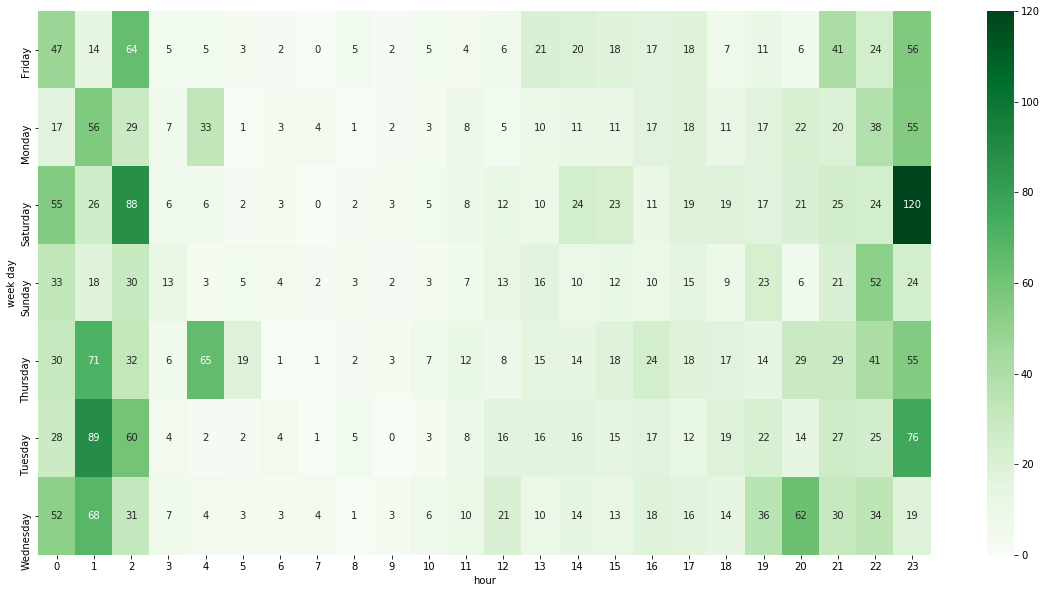

In [124]:
plt.figure(figsize=(20,10))
sns.heatmap(tadct, annot=True, fmt='g', cmap="Greens")

In [125]:
# Orders with highest average values occur between 12:00 am to 5 am
# Saturday has the highest average value order
# Second highest average order values are on Sunday and Wednesday
# Lowest average order values are on Friday

In [126]:
# Total value of transactions in week days on hourly basis
tottable=pd.pivot_table(dat,index=["week day"],values=["Amount"],columns=["hour"],aggfunc=[np.sum],margins=True).T
tottable

week day          Friday   Monday  Saturday   Sunday  Thursday  Tuesday  \
           hour                                                           
sum Amount 0     4788.75  1807.00   5837.50  3790.75   4629.75  2208.25   
           1      979.25  7664.75   3314.00  1864.50  10670.04  9082.30   
           2     8411.25  4051.75  10669.75  3451.29   3111.75  9603.00   
           3      640.00  1033.50    696.00  1766.00    823.00   263.00   
           4      517.50  3669.20   1355.50   425.50   9021.54   210.00   
           5      457.75   103.00    200.00   546.50   2239.50   261.75   
           6       37.00   295.25    600.00   828.00    155.00   452.75   
           7         nan   189.50       nan   256.30     23.00    30.00   
           8      488.50    82.00   1785.00   646.00     52.25   991.50   
           9      182.25   638.75    129.00   130.50    323.00      nan   
           10     192.50   174.00    535.50   203.00    408.75   405.00   
           11     297.50  1007.00    907.75  1017.00   1042.75   684.00   
           12     746.75  1006.50   1487.25   897.50    517.00  1829.50   
           13    2130.79  1217.00   2160.00  1327.05   1205.25  1327.75   
           14    1900.00  1545.00   3675.25  1202.00   1115.00  1400.50   
           15    1794.25   911.50   2412.00  2613.50   2145.75  2024.25   
           16    1958.75  1247.50   1296.50  1789.50   3513.04  1745.00   
           17    1598.25  1620.25   2242.85  1500.50   2702.25  1850.50   
           18     612.25  1006.75   2524.00   696.75   1300.50  2008.00   
           19    1418.25  2041.50   2687.75  1869.15   2820.75  1991.50   
           20     753.25  1882.00   1780.25   305.50   2560.55   933.75   
           21    4127.00  1731.00   3571.75  2340.25   3465.25  2395.75   
           22    3178.00  5320.05   2569.75  5984.00   4652.00  3531.54   
           23    5287.75  7064.00  15463.50  3286.75   5746.00  8268.50   
           All  42497.54 47308.75  67900.85 38737.79  64243.67 53498.09   

week day         Wednesday       All  
           hour                       
sum Amount 0       5651.79  28713.79  
           1       7866.25  41441.09  
           2       4417.75  43716.54  
           3       1032.50   6254.00  
           4        593.00  15792.24  
           5        248.50   4057.00  
           6        508.54   2876.54  
           7        213.00    711.80  
           8         75.00   4120.25  
           9        193.50   1597.00  
           10       742.50   2661.25  
           11       780.00   5736.00  
           12      1602.75   8087.25  
           13      1683.50  11051.34  
           14      1061.50  11899.25  
           15      1614.00  13515.25  
           16      2421.00  13971.29  
           17      2167.50  13682.10  
           18      1258.00   9406.25  
           19      4230.00  17058.90  
           20      8181.50  16396.80  
           21      3649.50  21280.50  
           22      3222.00  28457.34  
           23      2322.75  47439.25  
           All    55736.33 369923.02

In [127]:
# Thursday is having the highest value of sales
# This is followed by Saturday and Wednesday
# Lowest sales are on Friday
# Highest sales are from 6 pm to 12 pm. But the average value of sales is less than 12:00 am to 5 am period. This means maximum people are buyng during this period

In [128]:
# Recommendations
# Saturday evening hours from 6 pm to 12 pm is best period to advertise
# Next best day is Wednesday followed by Thursday
# Morning 12:00 am to 5 am is also good for avertisement
# It is better not to advertise on Friday 

In [129]:
tottable=pd.pivot_table(dat,index=["week day"],values=["Amount"],columns=["hour"],aggfunc=[np.sum])
tottable

sum                                                          \
           Amount                                                           
hour           0        1        2       3       4       5      6      7    
week day                                                                    
Friday    4788.75   979.25  8411.25  640.00  517.50  457.75  37.00    nan   
Monday    1807.00  7664.75  4051.75 1033.50 3669.20  103.00 295.25 189.50   
Saturday  5837.50  3314.00 10669.75  696.00 1355.50  200.00 600.00    nan   
Sunday    3790.75  1864.50  3451.29 1766.00  425.50  546.50 828.00 256.30   
Thursday  4629.75 10670.04  3111.75  823.00 9021.54 2239.50 155.00  23.00   
Tuesday   2208.25  9082.30  9603.00  263.00  210.00  261.75 452.75  30.00   
Wednesday 5651.79  7866.25  4417.75 1032.50  593.00  248.50 508.54 213.00   

                                                                         \
                                                                          
hour           8      9      10      11      12      13      14      15   
week day                                                                  
Friday     488.50 182.25 192.50  297.50  746.75 2130.79 1900.00 1794.25   
Monday      82.00 638.75 174.00 1007.00 1006.50 1217.00 1545.00  911.50   
Saturday  1785.00 129.00 535.50  907.75 1487.25 2160.00 3675.25 2412.00   
Sunday     646.00 130.50 203.00 1017.00  897.50 1327.05 1202.00 2613.50   
Thursday    52.25 323.00 408.75 1042.75  517.00 1205.25 1115.00 2145.75   
Tuesday    991.50    nan 405.00  684.00 1829.50 1327.75 1400.50 2024.25   
Wednesday   75.00 193.50 742.50  780.00 1602.75 1683.50 1061.50 1614.00   

                                                                            
                                                                            
hour           16      17      18      19      20      21      22       23  
week day                                                                    
Friday    1958.75 1598.25  612.25 1418.25  753.25 4127.00 3178.00  5287.75  
Monday    1247.50 1620.25 1006.75 2041.50 1882.00 1731.00 5320.05  7064.00  
Saturday  1296.50 2242.85 2524.00 2687.75 1780.25 3571.75 2569.75 15463.50  
Sunday    1789.50 1500.50  696.75 1869.15  305.50 2340.25 5984.00  3286.75  
Thursday  3513.04 2702.25 1300.50 2820.75 2560.55 3465.25 4652.00  5746.00  
Tuesday   1745.00 1850.50 2008.00 1991.50  933.75 2395.75 3531.54  8268.50  
Wednesday 2421.00 2167.50 1258.00 4230.00 8181.50 3649.50 3222.00  2322.75

In [130]:
xcolumn = list(range(0,24))
xcolumn

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

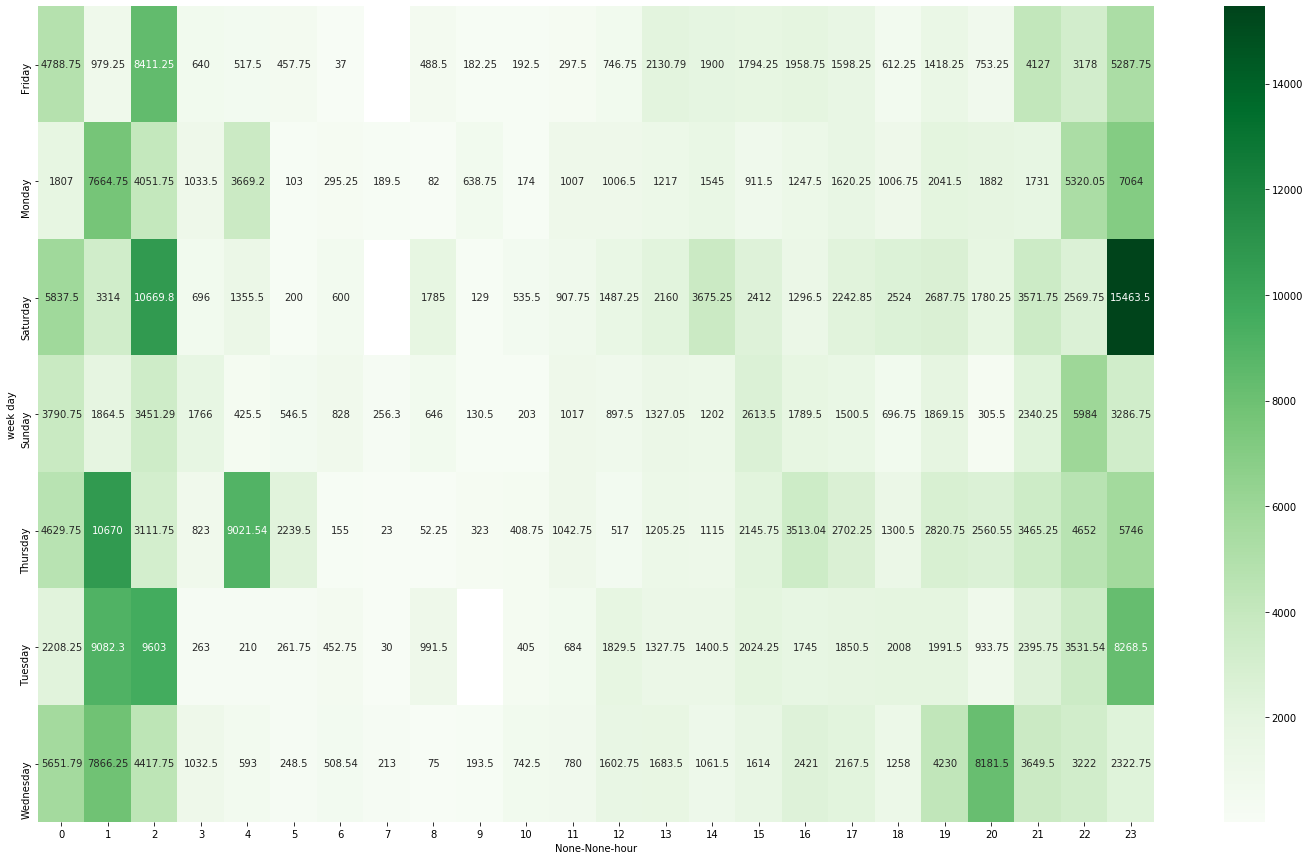

In [131]:
plt.figure(figsize=(25,15))
sns.heatmap(tottable, annot=True, fmt='g', cmap="Greens", xticklabels=xcolumn)

In [132]:
avgtable=pd.pivot_table(dat,index=["week day"],values=["Amount"],columns=["hour"])
avgtable

Amount                                                          \
hour          0      1      2      3      4      5      6      7      8    
week day                                                                   
Friday    101.89  69.95 131.43 128.00 103.50 152.58  18.50    nan  97.70   
Monday    106.29 136.87 139.72 147.64 111.19 103.00  98.42  47.38  82.00   
Saturday  106.14 127.46 121.25 116.00 225.92 100.00 200.00    nan 892.50   
Sunday    114.87 103.58 115.04 135.85 141.83 109.30 207.00 128.15 215.33   
Thursday  154.32 150.28  97.24 137.17 138.79 117.87 155.00  23.00  26.12   
Tuesday    78.87 102.05 160.05  65.75 105.00 130.88 113.19  30.00 198.30   
Wednesday 108.69 115.68 142.51 147.50 148.25  82.83 169.51  53.25  75.00   

                                                                          \
hour          9      10     11     12     13     14     15     16     17   
week day                                                                   
Friday     91.12  38.50  74.38 124.46 101.47  95.00  99.68 115.22  88.79   
Monday    319.38  58.00 125.88 201.30 121.70 140.45  82.86  73.38  90.01   
Saturday   43.00 107.10 113.47 123.94 216.00 153.14 104.87 117.86 118.04   
Sunday     65.25  67.67 145.29  69.04  82.94 120.20 217.79 178.95 100.03   
Thursday  107.67  58.39  86.90  64.62  80.35  79.64 119.21 146.38 150.12   
Tuesday      nan 135.00  85.50 114.34  82.98  87.53 134.95 102.65 154.21   
Wednesday  64.50 123.75  78.00  76.32 168.35  75.82 124.15 134.50 135.47   

                                                     
hour          18     19     20     21     22     23  
week day                                             
Friday     87.46 128.93 125.54 100.66 132.42  94.42  
Monday     91.52 120.09  85.55  86.55 140.00 128.44  
Saturday  132.84 158.10  84.77 142.87 107.07 128.86  
Sunday     77.42  81.27  50.92 111.44 115.08 136.95  
Thursday   76.50 201.48  88.29 119.49 113.46 104.47  
Tuesday   105.68  90.52  66.70  88.73 141.26 108.80  
Wednesday  89.86 117.50 131.96 121.65  94.76 122.25

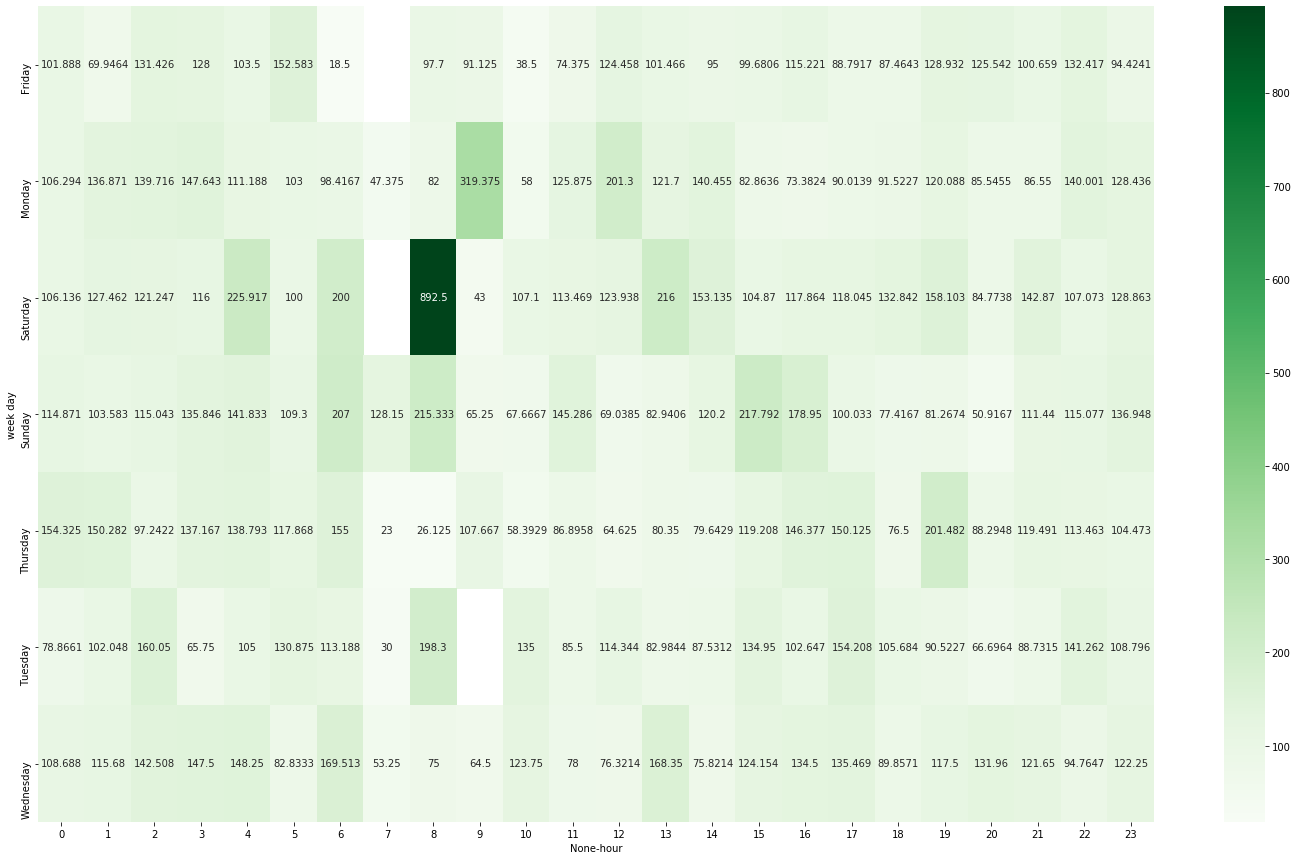

In [133]:
plt.figure(figsize=(25,15))
sns.heatmap(avgtable, annot=True, fmt='g', cmap="Greens", xticklabels=xcolumn)

In [134]:
dat.head()

,Order,Name,Kind,Gateway,Date,Status,Amount,Currency,Card Type,year,month,day,hour,week day
0,2370000000000.00,#3803,sale,Cash on Delivery (COD),2020-07-10 16:53:06,pending,222.25,QAR,nan,2020,7,10,16,Friday
1,2370000000000.00,#3802,sale,Card on delivery,2020-07-10 16:26:27,pending,30.00,QAR,nan,2020,7,10,16,Friday
2,2370000000000.00,#3801,sale,Card on delivery,2020-07-10 16:07:43,pending,114.25,QAR,nan,2020,7,10,16,Friday
3,2370000000000.00,#3800,sale,Cash on Delivery (COD),2020-07-10 15:24:56,pending,70.00,QAR,nan,2020,7,10,15,Friday
4,2370000000000.00,#3799,sale,Cash on Delivery (COD),2020-07-10 15:23:40,pending,152.00,QAR,nan,2020,7,10,15,Friday


In [135]:
dat.head()

,Order,Name,Kind,Gateway,Date,Status,Amount,Currency,Card Type,year,month,day,hour,week day
0,2370000000000.00,#3803,sale,Cash on Delivery (COD),2020-07-10 16:53:06,pending,222.25,QAR,nan,2020,7,10,16,Friday
1,2370000000000.00,#3802,sale,Card on delivery,2020-07-10 16:26:27,pending,30.00,QAR,nan,2020,7,10,16,Friday
2,2370000000000.00,#3801,sale,Card on delivery,2020-07-10 16:07:43,pending,114.25,QAR,nan,2020,7,10,16,Friday
3,2370000000000.00,#3800,sale,Cash on Delivery (COD),2020-07-10 15:24:56,pending,70.00,QAR,nan,2020,7,10,15,Friday
4,2370000000000.00,#3799,sale,Cash on Delivery (COD),2020-07-10 15:23:40,pending,152.00,QAR,nan,2020,7,10,15,Friday
